[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_mog_quickstart.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# Density plot tutorial

One of the most useful tools in **MultiMin** is the visualization of the probability density of a data distribution. In this tutorial, you will learn how to use the **DensityPlot** class and its most interesting features, not only for viewing data but also for visualizing the probability density of a data distribution.

## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [17]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import multimin as mn
mn.show_watermark = True

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import numpy as np
import pandas as pd
np.random.seed(1)
deg = np.pi/180

import warnings
warnings.filterwarnings("ignore")

figprefix = "multiplot"

## Real data

**multimin** was originally developed to solve the problem of describing the distribution of asteroids in the space of orbital elements. This is a true scientific application of the package that illustrate the power of the methods and the versatility of the numerical methods provided by the package.

Load the dataset (e.g. orbital elements):

In [19]:
# NEA Data
df_neas=pd.read_json(mn.Util.get_data("nea_data.json.gz"))

# Let's filter 10000 asteroids
df_neas=df_neas.sample(10000)

# Let's select the columns we want to fit
df_neas["q"]=df_neas["a"]*(1-df_neas["e"])
data_neas=np.array(df_neas[["q","e","i","Node","Peri","M"]])

## Representing the data

To create a graphical representation of a dataset like **data_neas**, the first thing we need is a description of the variables:

In [20]:
properties=dict(
    q=dict(label=r"$q$ [au]",range=[0.0,1.3]),
    e=dict(label=r"$e$",range=[0.0,1.0]),
    i=dict(label=r"$I$ [deg]",range=[0.0,180.0]),
    W=dict(label=r"$\Omega$ [deg]",range=[0,360]),
    w=dict(label=r"$\omega$ [deg]",range=[0,360]),
)

Now we must instantiate the **MultiPlot** object:

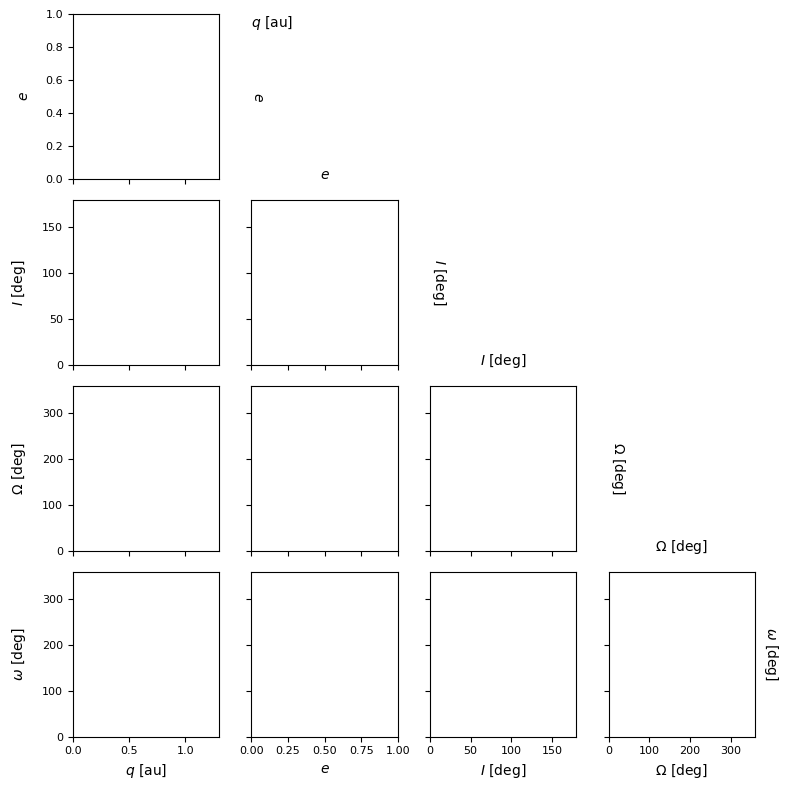

In [21]:
G=mn.MultiPlot(properties,figsize=2)

Once the **MultiPlot** object is instantiated, we can add content to it. There are 4 methods to do so:

- **sample_scatter**: Adds a scatter plot of a random sample.
- **sample_hist**: Adds a histogram of a random sample.
- **mog_pdf**: Adds the density of the Gaussian mixture.
- **mog_contour**: Adds the contour of the Gaussian mixture.

Por ejemplo para mostrar la distribución de elementos orbitales:

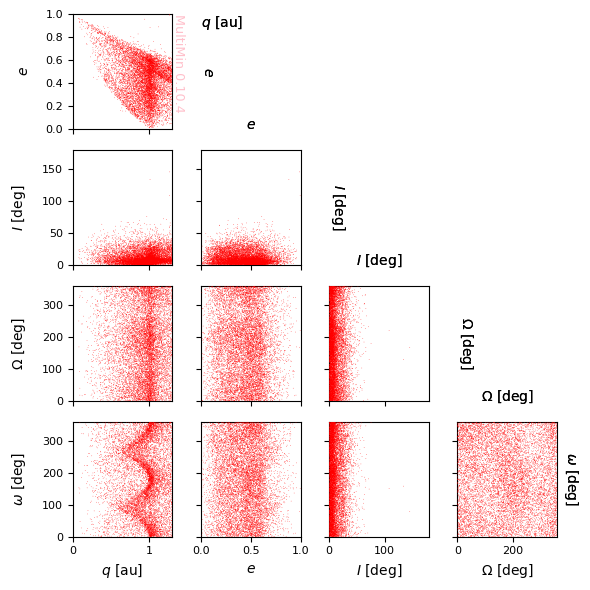

In [22]:
G=mn.MultiPlot(properties,figsize=1.5)

sargs=dict(s=0.2,edgecolor='None',color='r')
scatter=G.sample_scatter(data_neas,**sargs)

plt.savefig(f'gallery/{figprefix}_data_neas.png')

You can add marginal plots:

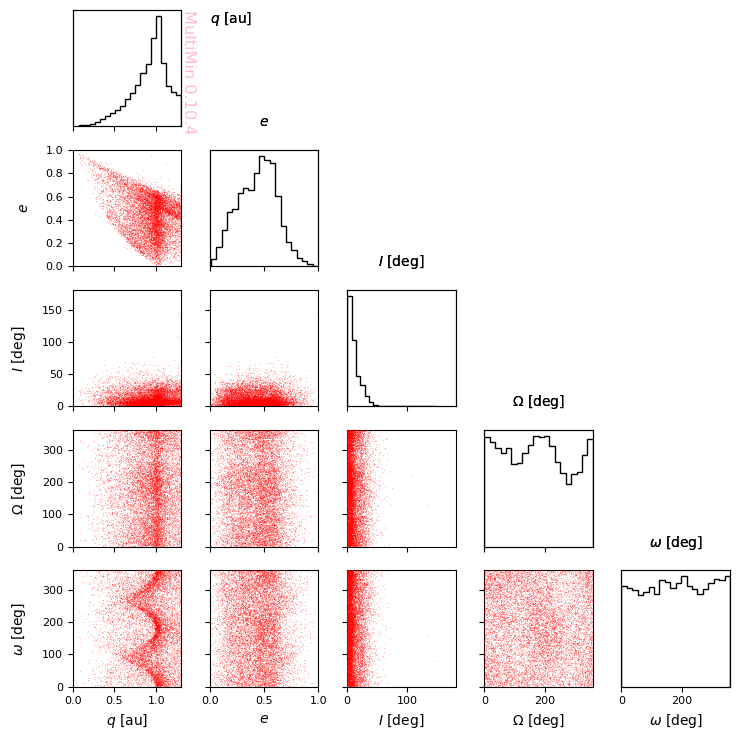

In [23]:
G=mn.MultiPlot(properties,figsize=1.5,marginals=True)

sargs=dict(s=0.2,edgecolor='None',color='r')
scatter=G.sample_scatter(data_neas,**sargs)

plt.savefig(f'gallery/{figprefix}_data_neas.png')

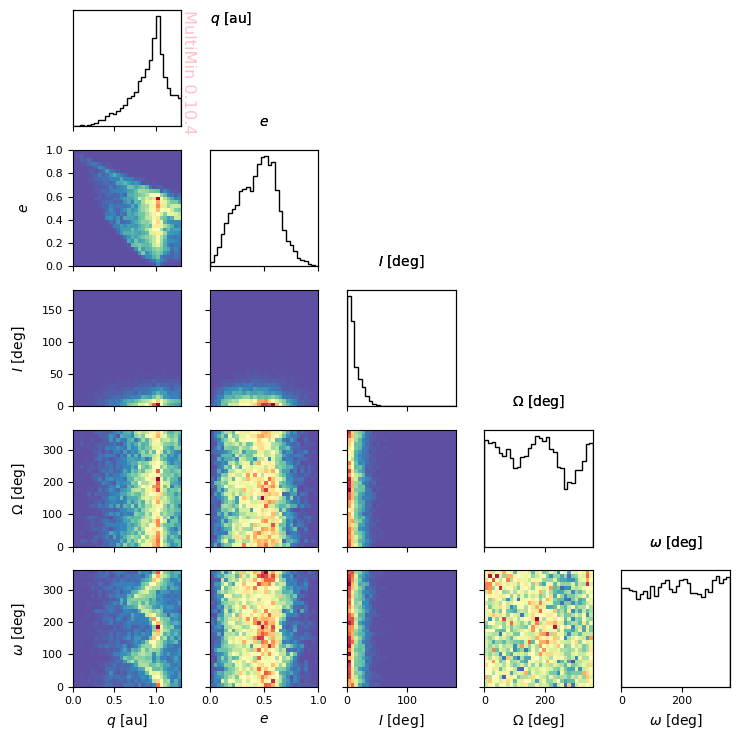

In [24]:
G=mn.MultiPlot(properties,figsize=1.5, marginals=True)

hargs=dict(bins=30,cmap='Spectral_r')
hist=G.sample_hist(data_neas,**hargs)

plt.savefig(f'gallery/{figprefix}_data_neas_hist.png')

You can also represent the **pdf** of some probability distribution. First, we generate a MoG:

In [25]:
np.random.seed(5)
mus = np.array([[np.random.uniform(*properties[k]['range']) for k in properties] for _ in range(3)])
Sigmas = np.array([np.diag([(0.3 * np.mean(properties[k]['range']))**2 for k in properties]) for _ in range(3)])
mog = mn.MixtureOfGaussians(
    mus=mus,
    Sigmas=Sigmas,
    weights=[1]*3
)

Y ahora procedemos a graficarla:

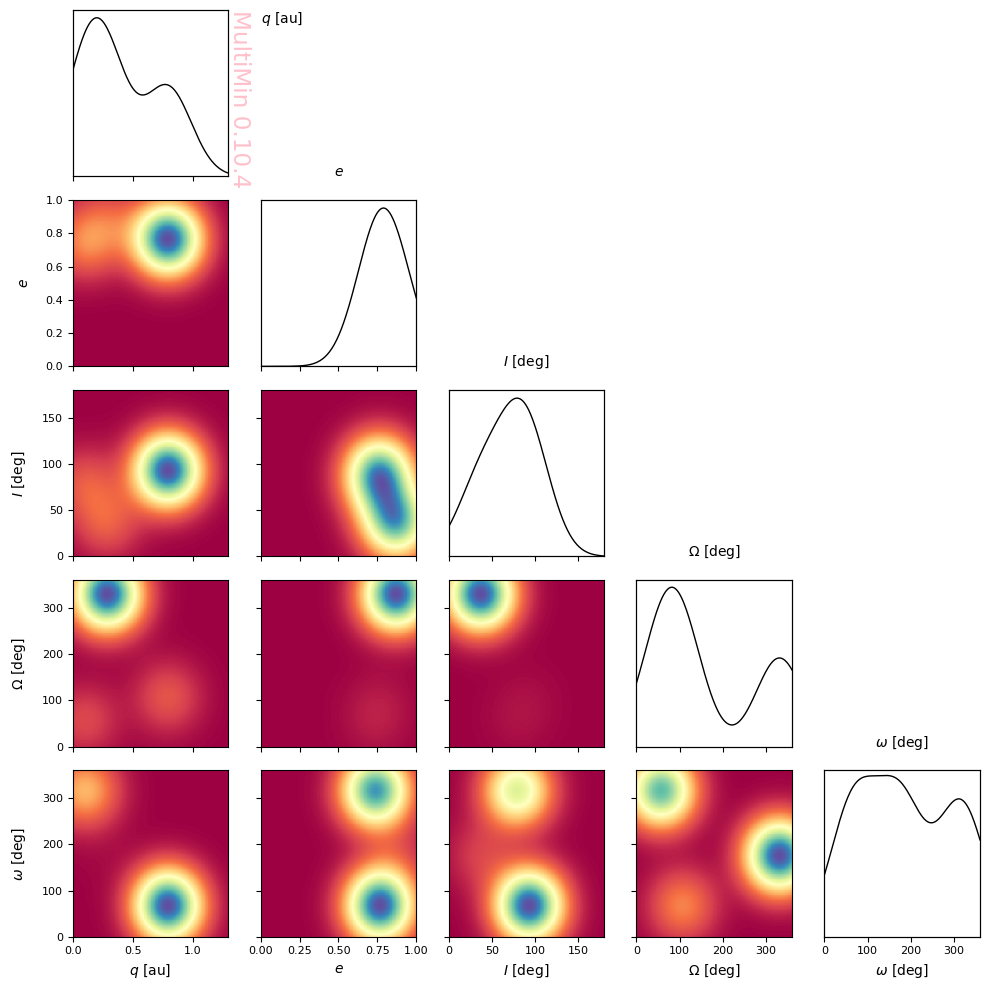

In [26]:
G=mn.MultiPlot(properties,figsize=2,marginals=True)

pargs = dict(cmap='Spectral')
G.mog_pdf(mog,**pargs)

plt.savefig(f'gallery/{figprefix}_sample_mog.png')


You can also plot the contours:

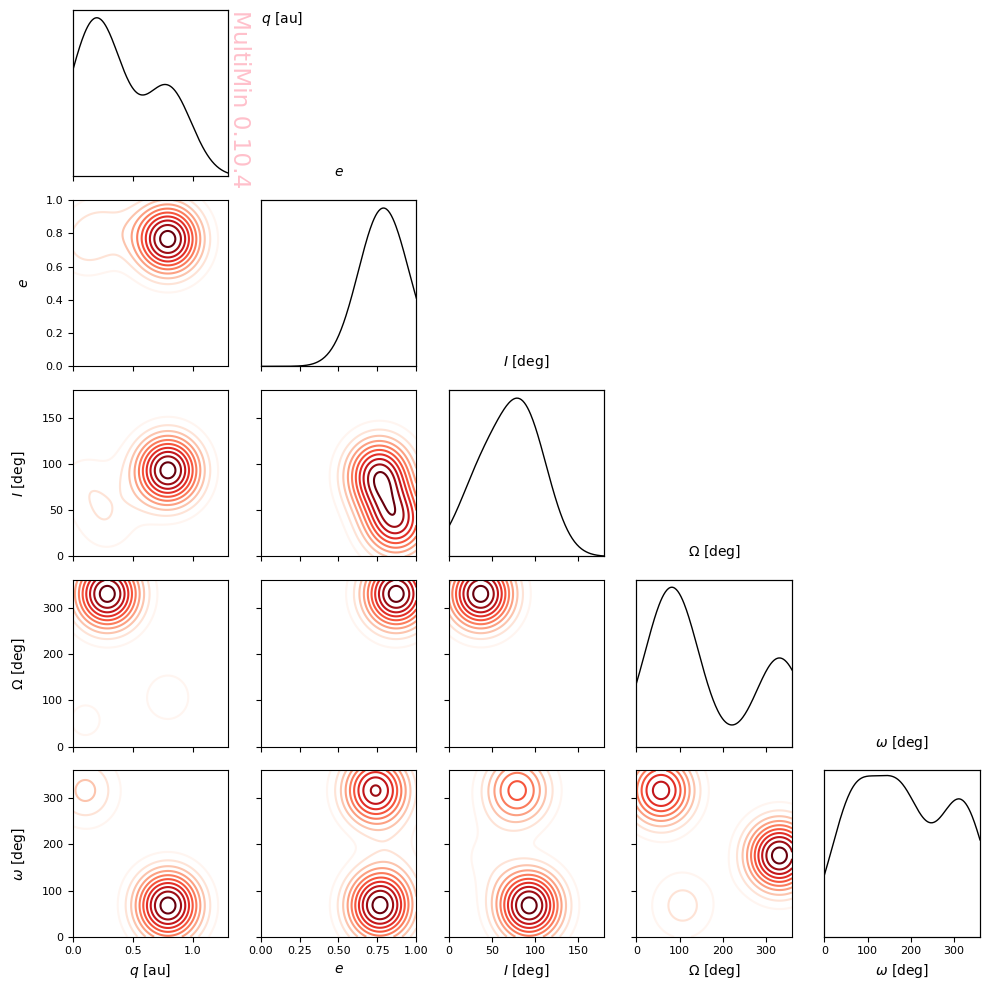

In [27]:
G=mn.MultiPlot(properties,figsize=2,marginals=True)

cargs = dict(levels=10)
G.mog_contour(mog,**cargs)

plt.savefig(f'gallery/{figprefix}_sample_mog_contours.png')

Or isolate them:

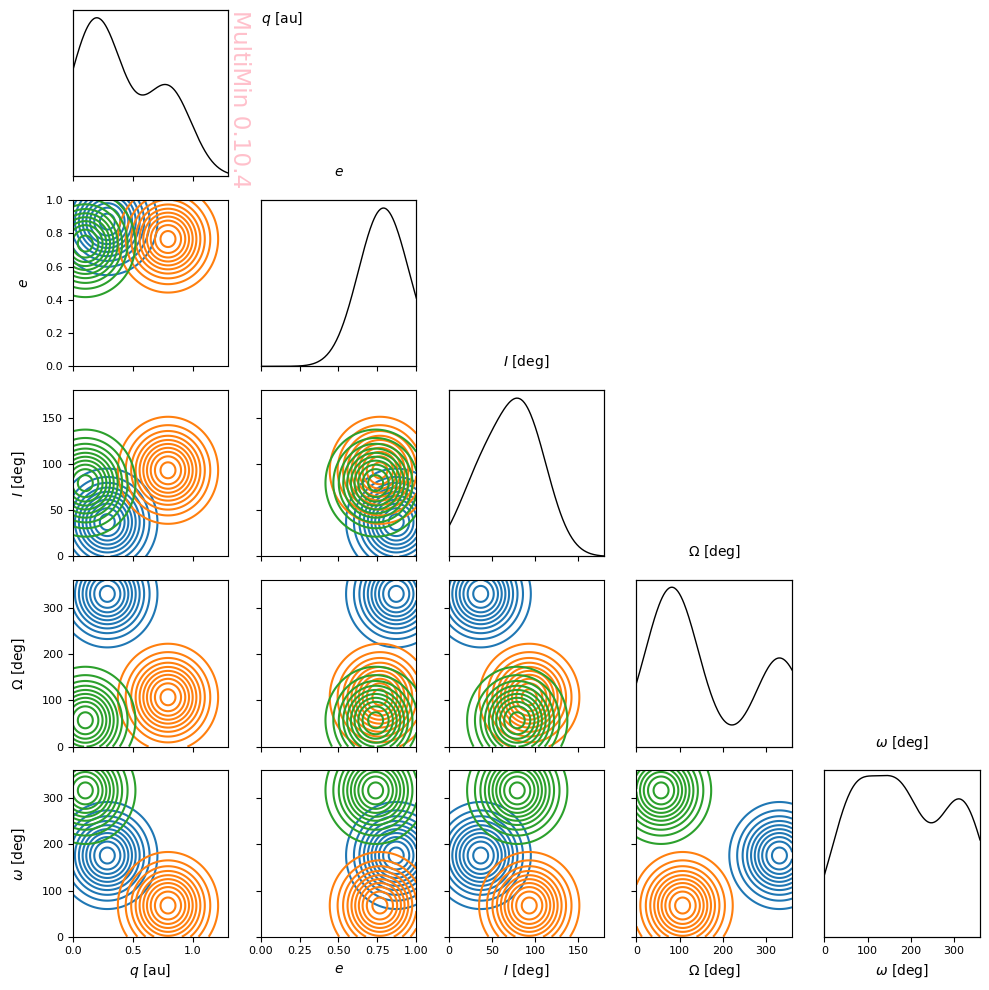

In [28]:
G=mn.MultiPlot(properties,figsize=2,marginals=True)

cargs = dict(levels=10, decomp=True, legend=False)
G.mog_contour(mog,**cargs)

plt.savefig(f'gallery/{figprefix}_sample_mog_contours_decomposed.png')

Or put them together:

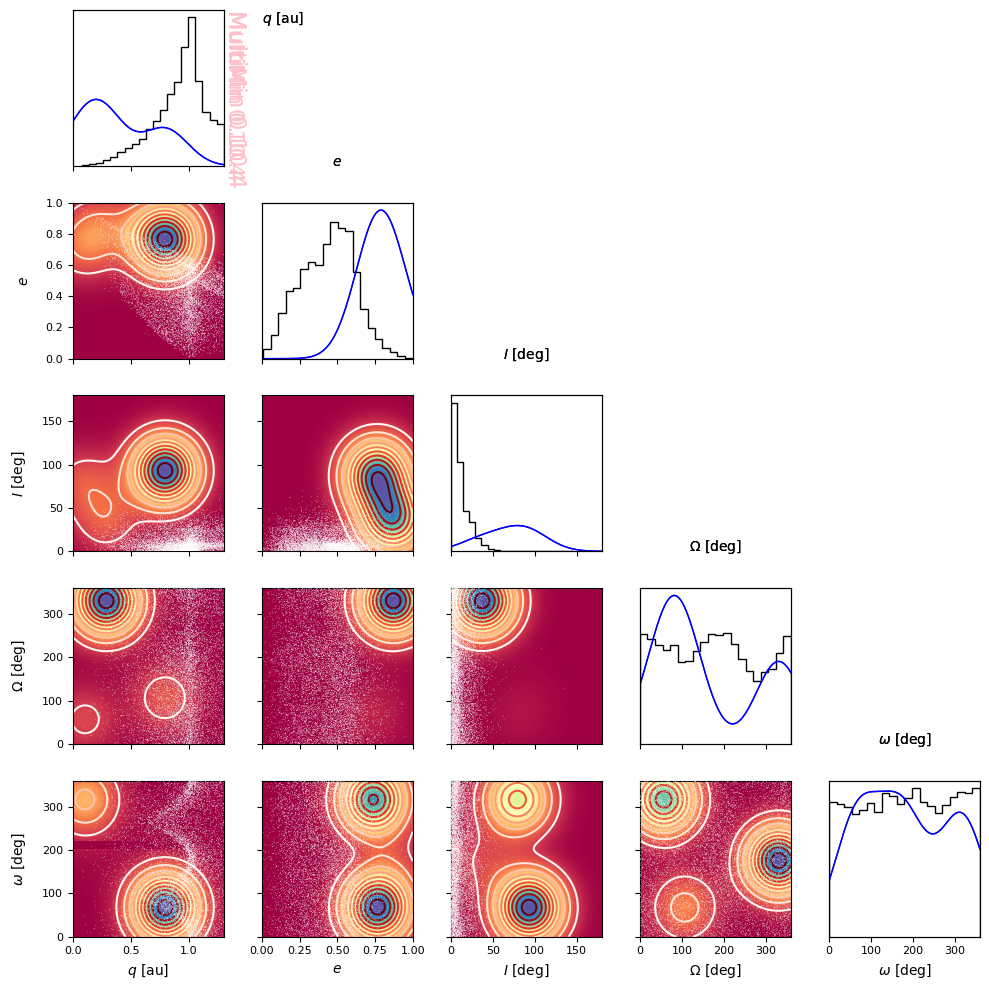

In [29]:
G=mn.MultiPlot(properties,figsize=2,marginals=True)

sargs=dict(s=0.2,edgecolor='None',color='w')
scatter=G.sample_scatter(data_neas,**sargs)

pargs = dict(cmap='Spectral',margs=dict(color='b'))
G.mog_pdf(mog,**pargs)

cargs = dict(levels=10,margs=dict(color='b'))
G.mog_contour(mog,**cargs)

plt.savefig(f'gallery/{figprefix}_multiple_content.png')

---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga